In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
import torch


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/2022/Especialización IA/dl/dataset_wine.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

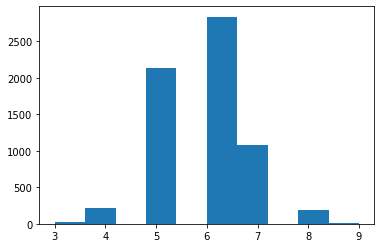

In [4]:
quality = df.quality.to_numpy()
fix, ax1 = plt.subplots(1,1)
ax1.hist(quality)

In [5]:
df["quality_label"] = df.quality.apply(lambda label: 0 if label <= 6 else 1)
print(len(df[df["quality_label"] == 0]))
print(len(df[df["quality_label"] == 1]))

5220
1277


In [6]:
# clasif binaria, modelo tonto, devolver la clase mayoritaria
# regresion, modelo tonto, devolver el promedio de tu salida

In [7]:
# Variable tipo
print(df["type"].unique())

type_dummies = pd.get_dummies(df["type"], prefix="type")
type_dummies.info()

['white' 'red']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_red    6497 non-null   uint8
 1   type_white  6497 non-null   uint8
dtypes: uint8(2)
memory usage: 12.8 KB


In [8]:
df = pd.concat([df, type_dummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
 15  quality_label        

In [9]:
# Limpieza
nans = df[df.isna().sum(axis=1) >= 1]
print(nans.shape)

(34, 18)


In [10]:
df = df[df.isna().sum(axis=1) == 0]
print(df.shape)

(6463, 18)


In [11]:
y = df["quality_label"]
X = df.drop(["Unnamed: 0", "type", "quality", "quality_label", "vendor_id"], axis=1)

In [12]:
## Normalizacion
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [13]:
X_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.282459,0.173059,0.192023,0.074294,0.078166,0.102489,0.252752,0.146283,0.386304,0.174803,0.361279,0.246480,0.753520
std,0.107266,0.109759,0.087501,0.072958,0.058265,0.061663,0.130246,0.057865,0.124535,0.083659,0.172917,0.430995,0.430995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100636,0.302326,0.117978,0.217391,0.000000,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.000000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190669,0.465116,0.213483,0.478261,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
print(X_norm.shape)

(6463, 13)


In [15]:
n = X_norm.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.85*n)]
valid_idx = idx[int(0.85 * n):]
print(len(train_idx))
print(len(valid_idx))

5493
970


In [16]:
y_ = y.to_numpy()

In [17]:
X_norm_ = X_norm.to_numpy()
X_train = X_norm_[train_idx,:]
y_train = y_[train_idx]
X_valid = X_norm_[valid_idx,:]
y_valid = y_[valid_idx]

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(5493, 13)
(5493,)
(970, 13)
(970,)


## NNet sin embeddings

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

In [26]:
class MyDataset(Dataset):

    def __init__(self, X, y):
      super().__init__()
      self.X = X
      self.y = y

    def __len__(self):
      return self.X.shape[0]

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

In [27]:
train = MyDataset(X_train, y_train)

In [28]:
len(train)

5493

In [29]:
X0, y0 = train[0]

In [30]:
X0.shape

(13,)

In [31]:
X_train.shape

(5493, 13)

In [32]:
y0

0

In [33]:
valid = MyDataset(X_valid, y_valid)

In [34]:
len(valid)

970

In [35]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloder = DataLoader(valid, batch_size=64, shuffle=True)

In [36]:
batch_1 = next(iter(train_dataloader))

In [37]:
type(batch_1)

list

In [38]:
len(batch_1)

2

In [39]:
type(batch_1[0])

torch.Tensor

In [40]:
print(batch_1[0].shape)  # 64 filas de X_train (dataset entrenamiento)

torch.Size([64, 13])


In [41]:
print(batch_1[1].shape)  # 64 filas de y_train (label)

torch.Size([64])


In [42]:
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=100, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

  
  def forward(self, x): # x.shape -> 64x13
    x = self.linear_1(x) # 64x100
    x = self.relu_1(x) # 64x100
    x = self.linear_2(x) # 64x50
    x = self.relu_2(x) # 64x50
    x = self.output(x) # 64x1
    return x

In [43]:
nnet = NNet()

In [44]:
x_batch = next(iter(train_dataloader))[0]
x_batch = x_batch.float()
y_batch = nnet(x_batch)

In [45]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [46]:
device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

In [47]:
print(device)

cuda:0


In [48]:
nnet.to(device)

loss_list = []
train_auc = []

for epoch in range(100):

  running_loss = 0
  running_y_hat = []
  running_y_label = []
  running_y_score = []

  for i, data in enumerate(train_dataloader):
    X_batch, y_batch = data # datos del batch
    X_batch = X_batch.to(device).float()
    Y_batch = y_batch.to(device).float()

    # forward
    optimizer.zero_grad()
    y_batch_score = nnet(X_batch).reshape(-1)
    y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

    # backprop
    loss = loss_function(y_batch_score, Y_batch) # calcula el loss
    loss.backward() # hacer los gradientes del loss

    # actualizacion de parametros
    optimizer.step()

    # metrics
    running_loss += loss.item()
    running_y_score += list(y_batch_score.detach().cpu().numpy())
    running_y_label += list(Y_batch.detach().cpu().numpy())

  # metrics
  print(f"Epoch {epoch} | Training loss: {running_loss}")
  loss_list.append(running_loss)
  fpr, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
  train_auc.append(metrics.auc(fpr, tpr))

Epoch 0 | Training loss: 2863.554454803467
Epoch 1 | Training loss: 2533.2337493896484
Epoch 2 | Training loss: 2347.5042304992676
Epoch 3 | Training loss: 2255.5998001098633
Epoch 4 | Training loss: 2226.648561477661
Epoch 5 | Training loss: 2187.053747177124
Epoch 6 | Training loss: 2177.1876153945923
Epoch 7 | Training loss: 2155.581606864929
Epoch 8 | Training loss: 2161.871156692505
Epoch 9 | Training loss: 2138.943347930908
Epoch 10 | Training loss: 2137.8770141601562
Epoch 11 | Training loss: 2128.637369155884
Epoch 12 | Training loss: 2123.5082244873047
Epoch 13 | Training loss: 2121.8885202407837
Epoch 14 | Training loss: 2114.2859840393066
Epoch 15 | Training loss: 2102.8714542388916
Epoch 16 | Training loss: 2086.716417312622
Epoch 17 | Training loss: 2085.4828157424927
Epoch 18 | Training loss: 2079.690860748291
Epoch 19 | Training loss: 2072.7680988311768
Epoch 20 | Training loss: 2063.6528749465942
Epoch 21 | Training loss: 2053.983709335327
Epoch 22 | Training loss: 2071

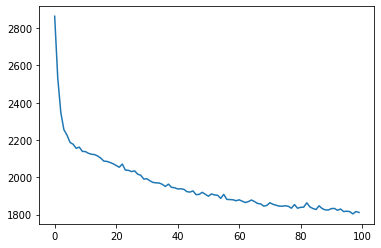

In [49]:
fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list))
ax1.plot(x, loss_list)

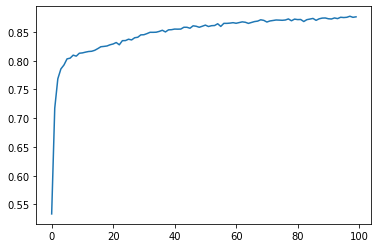

In [50]:
fig, ax1 = plt.subplots(1,1)
x = range(0, len(train_auc))
ax1.plot(x, train_auc)

## NNet with embeddings

In [18]:
device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

In [19]:
vendor_id = df["vendor_id"]

In [20]:
unique = np.unique(vendor_id)
index = np.arange(0, len(unique))
vendor_id_to_index = {key: value for key, value in zip(unique, index)}

In [21]:
vendors_idx = np.array([vendor_id_to_index[vendor] for vendor in vendor_id])

In [22]:
print(max(vendors_idx))
print(min(vendors_idx))

499
0


In [51]:
class CustomDatasetWithEmb(Dataset):

  def __init__(self, X, vendor_idx, y):
    super().__init__()
    self.X = X
    self.vendors_idx = vendors_idx
    self.y = y
  
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
      return self.X[idx], self.vendors_idx[idx], self.y[idx]

In [52]:
vendors_index_train = vendors_idx[train_idx]
vendors_index_val = vendors_idx[valid_idx]
train = CustomDatasetWithEmb(X_train, vendors_index_train, y_train)
valid = CustomDatasetWithEmb(X_valid, vendors_index_val, y_valid)

In [53]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)

In [54]:
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self, number_of_vendors, d):
    super().__init__()
    self.embedding = torch.nn.Embedding(num_embeddings=number_of_vendors, embedding_dim=d)
    self.linear_1 = torch.nn.Linear(in_features=(13+d), out_features=100, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

  
  def forward(self, x, vendor_idx):
    vendor_emb = self.embedding(vendor_idx) # (64, d)

    final_input = torch.cat([x, vendor_emb], dim=1) #. (64, 13+d)

    x = self.linear_1(final_input) 
    x = self.relu_1(x) 
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [68]:
nnet2 = NNetWithEmbeddings(number_of_vendors=500, d=8)
optimizer = torch.optim.Adam(nnet2.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [69]:
nnet = nnet2

nnet.to(device)

loss_list = []
train_auc = []
validation_loss_list = []
validation_auc = []
for epoch in range(100):

    running_loss = 0
    running_y_score = []
    running_y_label = []

    #### TRAINING ####
    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, vendor_idx_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        vendor_idx_batch = vendor_idx_batch.to(device)
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch, vendor_idx_batch).reshape(-1)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())  
        running_y_label += list(Y_batch.detach().cpu().numpy()) 

    # Metrics
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")

    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad():

      running_validation_loss = 0
      running_validation_y_score = []
      running_validation_y_label = []

      for i, data in enumerate(valid_dataloader): 
        # Datos del batch
        X_validation_batch, vendor_idx_validation_batch, y_validation_batch = data
        X_validation_batch = X_validation_batch.to(device).float()
        vendor_idx_validation_batch = vendor_idx_validation_batch.to(device)
        Y_validation_batch = y_validation_batch.to(device).float()

        # Forward
        y_validation_batch_score = nnet(X_validation_batch, vendor_idx_validation_batch).reshape(-1)
        y_validation_batch_hat = torch.sigmoid(y_validation_batch_score).reshape(-1)

        validation_loss = loss_function(y_validation_batch_score, Y_validation_batch) #  Calcula el loss

        # Acumular validation loss
        running_validation_loss += loss.item()

        # Acumular metrics y_score and y
        running_validation_y_score += list(y_validation_batch_score.detach().cpu().numpy())
        running_validation_y_label += list(Y_validation_batch.detach().cpu().numpy())

      
      # Calcular las metricas (AUC)
      validation_loss_list.append(running_validation_loss)
      fpt_v, tpr_v, _ = metrics.roc_curve(running_validation_y_label, running_validation_y_score)
      auc_v = metrics.auc(fpt_v, tpr_v)
      validation_auc.append(auc_v)
      print(f"Epoch {epoch} | Validation loss: {running_validation_loss} | AUC: {auc_v}")


Epoch 0 | Training loss: 2844.103136062622 | AUC: 0.5154356577962192
Epoch 0 | Validation loss: 355.5496826171875 | AUC: 0.6050570372750643
Epoch 1 | Training loss: 2628.3460693359375 | AUC: 0.6374769931211375
Epoch 1 | Validation loss: 429.4400634765625 | AUC: 0.6798682519280206
Epoch 2 | Training loss: 2509.290853500366 | AUC: 0.7127068099521575
Epoch 2 | Validation loss: 357.4423828125 | AUC: 0.7420469151670952
Epoch 3 | Training loss: 2370.2718868255615 | AUC: 0.7615576103164883
Epoch 3 | Validation loss: 343.80926513671875 | AUC: 0.7694074014567267
Epoch 4 | Training loss: 2269.3487129211426 | AUC: 0.7834413881520295
Epoch 4 | Validation loss: 242.9267578125 | AUC: 0.7848784275921166
Epoch 5 | Training loss: 2204.308009147644 | AUC: 0.7975974162587403
Epoch 5 | Validation loss: 168.7073516845703 | AUC: 0.7825889031705225
Epoch 6 | Training loss: 2172.539333343506 | AUC: 0.8053843760248902
Epoch 6 | Validation loss: 310.9739074707031 | AUC: 0.7893637532133677
Epoch 7 | Training los

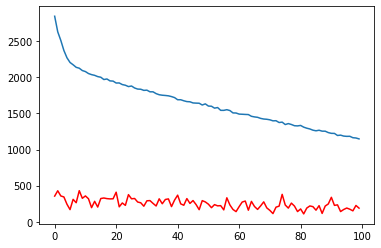

In [70]:
# Plot train loss and valid loss vs epochs

fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list))
ax1.plot(x, loss_list)
ax1.plot(x, validation_loss_list, color='r')

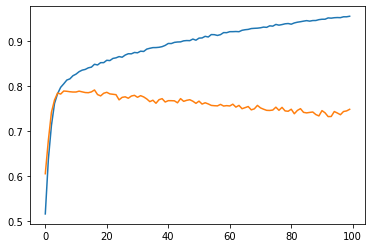

In [71]:
# Plot train auc y valid auc vs num epochs

fig, ax1 = plt.subplots(1,1)
x = range(0, len(train_auc))
ax1.plot(x, train_auc)
ax1.plot(x, validation_auc)